# Task 2 - Predictive Analytics

For the Data@ANZ Virtual Experience Program

1. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

2. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## Explore correlations between annual salary and various customer attributes

### First we identify monthly salary for each customer

In [4]:
df['month'] = pd.DatetimeIndex(df['date']).month
df[['customer_id', 'date', 'month']]

,customer_id,date,month
0,CUS-2487424745,2018-08-01,8
1,CUS-2487424745,2018-08-01,8
2,CUS-2142601169,2018-08-01,8
3,CUS-1614226872,2018-08-01,8
4,CUS-2487424745,2018-08-01,8
...,...,...,...
12038,CUS-55310383,2018-10-31,10
12039,CUS-2688605418,2018-10-31,10
12040,CUS-2663907001,2018-10-31,10
12041,CUS-1388323263,2018-10-31,10


In [5]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [6]:
df_salary_payment = df[df['txn_description']== 'PAY/SALARY'][['customer_id', 'month', 'amount']]
df_salary_payment.sort_values(by=['customer_id'])

,customer_id,month,amount
2530,CUS-1005756958,8,970.47
4402,CUS-1005756958,9,970.47
8142,CUS-1005756958,10,970.47
1744,CUS-1005756958,8,970.47
6271,CUS-1005756958,9,970.47
...,...,...,...
9914,CUS-883482547,10,3977.46
11784,CUS-883482547,10,3977.46
2427,CUS-883482547,8,3977.46
4293,CUS-883482547,9,3977.46


In [7]:
df_customer_salary = df_salary_payment.copy()

In [8]:
# Calculate customer salary payment per month
df_customer_salary = df_salary_payment.groupby(by=['customer_id', 'month'], as_index = False).sum()
df_customer_salary.rename(columns={'amount': 'amount_month'}, inplace=True)
df_customer_salary

,customer_id,month,amount_month
0,CUS-1005756958,8,3881.88
1,CUS-1005756958,9,3881.88
2,CUS-1005756958,10,4852.35
3,CUS-1117979751,8,7157.30
4,CUS-1117979751,9,7157.30
...,...,...,...
291,CUS-880898248,9,2867.96
292,CUS-880898248,10,2867.96
293,CUS-883482547,8,7954.92
294,CUS-883482547,9,7954.92


In [9]:
# Calculate customer number of salary payments per month
df_num_salary = df_salary_payment.groupby(by=['customer_id', 'month'] , as_index = False).count()
df_customer_salary['num_of_payments'] = df_num_salary['amount']
df_customer_salary

,customer_id,month,amount_month,num_of_payments
0,CUS-1005756958,8,3881.88,4
1,CUS-1005756958,9,3881.88,4
2,CUS-1005756958,10,4852.35,5
3,CUS-1117979751,8,7157.30,2
4,CUS-1117979751,9,7157.30,2
...,...,...,...,...
291,CUS-880898248,9,2867.96,2
292,CUS-880898248,10,2867.96,2
293,CUS-883482547,8,7954.92,2
294,CUS-883482547,9,7954.92,2


In [10]:
# Calculate customer base salary payment
df_base_salary = df_salary_payment.groupby(by=['customer_id', 'month'], as_index = False).agg(np.average)
df_customer_salary['salary'] = df_base_salary['amount']
df_customer_salary

,customer_id,month,amount_month,num_of_payments,salary
0,CUS-1005756958,8,3881.88,4,970.47
1,CUS-1005756958,9,3881.88,4,970.47
2,CUS-1005756958,10,4852.35,5,970.47
3,CUS-1117979751,8,7157.30,2,3578.65
4,CUS-1117979751,9,7157.30,2,3578.65
...,...,...,...,...,...
291,CUS-880898248,9,2867.96,2,1433.98
292,CUS-880898248,10,2867.96,2,1433.98
293,CUS-883482547,8,7954.92,2,3977.46
294,CUS-883482547,9,7954.92,2,3977.46


### Calculate Annual Salary Payment per Customer

In [11]:
df_annual_salary = df_salary_payment.drop(columns=['month'])
df_annual_salary = df_annual_salary.groupby(['customer_id'], as_index = False).sum()
df_annual_salary

,customer_id,amount
0,CUS-1005756958,12616.11
1,CUS-1117979751,25050.55
2,CUS-1140341822,11499.06
3,CUS-1147642491,22248.07
4,CUS-1196156254,27326.11
...,...,...
95,CUS-72755508,8703.84
96,CUS-809013380,13481.91
97,CUS-860700529,10851.72
98,CUS-880898248,8603.88


In [12]:
df_total_payments = df_customer_salary[['customer_id', 'num_of_payments']].groupby(['customer_id'], as_index=False).sum()
df_annual_salary['num_payments'] = df_total_payments['num_of_payments']
df_annual_salary

,customer_id,amount,num_payments
0,CUS-1005756958,12616.11,13
1,CUS-1117979751,25050.55,7
2,CUS-1140341822,11499.06,6
3,CUS-1147642491,22248.07,13
4,CUS-1196156254,27326.11,7
...,...,...,...
95,CUS-72755508,8703.84,12
96,CUS-809013380,13481.91,13
97,CUS-860700529,10851.72,6
98,CUS-880898248,8603.88,6


In [25]:
df_annual_salary['avg_num_payments'] = df_annual_salary['num_payments'].apply(lambda x : round(x/3.))
df_annual_salary

,customer_id,amount,num_payments,avg_num_payments
0,CUS-1005756958,12616.11,13,4
1,CUS-1117979751,25050.55,7,2
2,CUS-1140341822,11499.06,6,2
3,CUS-1147642491,22248.07,13,4
4,CUS-1196156254,27326.11,7,2
...,...,...,...,...
95,CUS-72755508,8703.84,12,4
96,CUS-809013380,13481.91,13,4
97,CUS-860700529,10851.72,6,2
98,CUS-880898248,8603.88,6,2


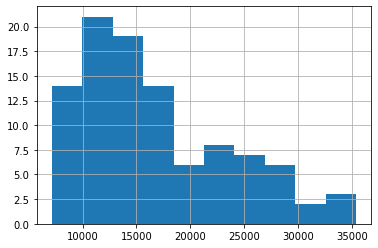

In [28]:
df_annual_salary['amount'].hist(bins=10)

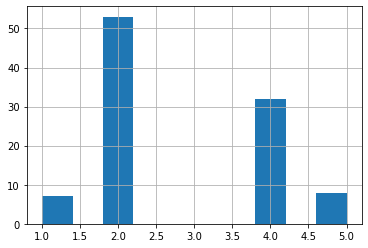

In [27]:
df_annual_salary['avg_num_payments'].hist(bins=10)

A little more than half of 100 customers have 2 payments per month. And one third has 4 payments per month. Could be an important feature to take into consideration.

In [16]:
df_annual_salary[df_annual_salary['customer_id'] == 'CUS-1005756958']

,customer_id,amount,num_payments
0,CUS-1005756958,12616.11,13


In [17]:
df_customer_salary[df_customer_salary['customer_id'] == 'CUS-1005756958']

,customer_id,month,amount_month,num_of_payments,salary
0,CUS-1005756958,8,3881.88,4,970.47
1,CUS-1005756958,9,3881.88,4,970.47
2,CUS-1005756958,10,4852.35,5,970.47
